# Python Programming

## 1. Introduction to Python

::::{hint} Prerequisites

:::{dropdown} **Scalar variables**: integers (`int`), floating point numbers (`float`), strings (`str`), *etc.*

```python
42  # int
1.0  # float
'these'
"are"
"""all
valid strings."""
```
:::

:::{dropdown} **Collections**: `list`, `tuple`, `dict`, `set`, *etc.*

```python
>>> # Lists: are mutable ordered-sequences
>>> my_things = [1, 2, 'banana']
>>> my_things.append(3.14)
>>> my_things
[1, 2, 'banana', 3.14]
```
```python
>>> # Tuples: are immutable ordered-sequences
>>> truthy_values = ('yes', 'ja', True, 1.0)
>>> del truthy_values[0]
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
TypeError: 'tuple' object doesn't support item deletion
```
```python
>>> # Dictionaries: key-value pairs or hash-maps
>>> game_status = {"jill": 99, "t-rex": "RIP"}
```
```python
>>> # Sets: unique unordered sequences
>>> fruits = {"apple", "banana", "banana"}
>>> fruits
{'apple', 'banana'}
```
:::

:::{dropdown} Control structures: `if-elif-else`, `for` loop, `while` loop, *etc.*

```python

# Conditional expressions
if 0.5 > schrödingers_cat > 1.0:
    print("Alive")
elif 0. > schrödingers_cat >= 0.5:
    print("Dead")
else:
    print("Undead")

# Loops
for i_day in range(365):
    print("Hi, good morning!")

while True:
    print("Na", end="")
    if input() == "stop":
        break
print("Batman!")
```

:::

:::{dropdown} Functions: built-in functions (`len`, `type`, ...) and user-defined functions.

```python
>>> greeting = "hello world"
>>> len(greeting)
11
>>> type(greeting)
<class 'str'>
```
:::

:::{seealso} Decorators: special syntax which modifies the behaviour of a function or a class.
:class: dropdown

```python
@something
def foo():
    ...
```

- `functools.lru_cache` for an example of a decorator,
- `functools.wraps` and `contextlib.contextmanager` to create your own decorators.

:::

::::


Python also uses and encourages us to structure code using
- Type annotations: hints which can be used by a type-checker or a compiler.
- Class: simple encapsulation, inheritance, *etc.*
- Modules: a `.py` file containing a valid Python code. Typically does not execute anything on import.
- Package: an installable, re-usable collection of modules and other files, distributable via PyPI or conda-forge

**but this is not necessary for the purpose of this webinar.**

## 2. Numpy, Pandas, Matplotlib

In [1]:
# Code for display_timings()

import matplotlib.pyplot as plt


def display_timings(**kwargs):
    nrows = len(kwargs)
    fig, ax = plt.subplots(figsize=(8,min(nrows,8)))
    keys = list(kwargs)
    fmt_keys = [k.replace('_', ' ') for k in kwargs]
    i_keys = list(range(len(keys)))
    
    ax.barh(i_keys, times := [kwargs[key].average for key in keys])
    ax.errorbar(times, i_keys, xerr=[kwargs[key].stdev for key in keys], fmt='ro')
    ax.set(xscale="log", xlabel="avg. wall time (seconds)")
    axis = plt.gca()
    axis.set_yticks(i_keys, fmt_keys)

### 2.1 Numpy

:::{important}`NumPy` is a Python library for arrays
It can be used to perform a wide variety of (efficient) mathematical operations and linear algebra on arrays and matrices.
:::

In [2]:
a = list(range(10000))
b = [0] * 10000

Why should use **loops**...

In [3]:
%%timeit -q -o
for i in range(len(a)):
    b[i] = a[i] ** 2

<TimeitResult : 2.04 ms ± 141 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [4]:
time_loops = _

In [5]:
import numpy as np

a = np.arange(10000)

... when you can **vectorize**!

In [6]:
%%timeit -q -o
b = a**2

<TimeitResult : 2.46 μs ± 4.49 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)>

In [7]:
time_vec = _

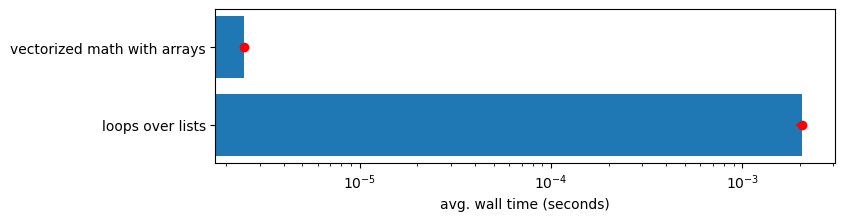

In [8]:
display_timings(loops_over_lists=time_loops, vectorized_math_with_arrays=time_vec)

:::{note}
Numpy is often imported as `np` and this is common convention.
:::

#### Creating arrays

Python sequences such as lists or tuples can be **transformed** into a Numpy array.

Numpy arrays can be **1D, 2D, .... n-dimensional**.

In [9]:
a = np.array([1, 2, 3])  # 1-dimensional array (rank 1)
b = np.array([[1, 2, 3], [4, 5, 6]])  # 2-dimensional array (rank 2)

print(b.shape)  # the shape (rows,columns)
print(b.size)  # number of elements

(2, 3)
6


It is often **homogenous**, that is made of a single data type

In [10]:
a.dtype

dtype('int64')

Arrays can also be **generated**.

In [11]:
np.eye(3)  # Identity "matrix"

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [12]:
a = np.arange(16)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [13]:
a = a.reshape(4, 4)

b = np.random.rand(16).reshape(4, 4)
b

array([[0.55403081, 0.17163643, 0.71619015, 0.42533191],
       [0.14103265, 0.47135134, 0.65908106, 0.93297914],
       [0.81571387, 0.93412729, 0.12112108, 0.85151007],
       [0.91137652, 0.12128887, 0.91577487, 0.86766297]])

#### Array maths and vectorization

In [14]:
c = np.add(a, b)  # equivalent to `a + b`
c

array([[ 0.55403081,  1.17163643,  2.71619015,  3.42533191],
       [ 4.14103265,  5.47135134,  6.65908106,  7.93297914],
       [ 8.81571387,  9.93412729, 10.12112108, 11.85151007],
       [12.91137652, 13.12128887, 14.91577487, 15.86766297]])

Other common mathematical operations include:
- elementwise operations:
    - `-` (numpy.subtract)
    - `*` (numpy.multiply)
    - `/` (numpy.divide)
    - `**` (numpy.pow())
- `.T` (numpy.transpose())
- `np.sqrt()`, `np.sum()`, `np.mean()`, `np.std()`, `np.max()`, `np.min()`
- `@` (np.dot() / np.matmul())

In [15]:
# Matrix multiplication
a * b

array([[ 0.        ,  0.17163643,  1.43238031,  1.27599573],
       [ 0.56413062,  2.35675671,  3.95448636,  6.53085395],
       [ 6.52571095,  8.4071456 ,  1.21121077,  9.36661081],
       [10.93651825,  1.57675528, 12.82084824, 13.01494462]])

In [16]:
np.dot(a, b)  # equals to `a @ b`

array([[ 4.50658996,  2.70347252,  3.64864784,  5.23898821],
       [14.19520539,  9.49708823, 13.29731649, 17.54892458],
       [23.88382082, 16.29070395, 22.94598515, 29.85886096],
       [33.57243625, 23.08431966, 32.5946538 , 42.16879734]])

In [17]:
np.matmul(a, b)

array([[ 4.50658996,  2.70347252,  3.64864784,  5.23898821],
       [14.19520539,  9.49708823, 13.29731649, 17.54892458],
       [23.88382082, 16.29070395, 22.94598515, 29.85886096],
       [33.57243625, 23.08431966, 32.5946538 , 42.16879734]])

### 2.2 Pandas

:::{important}`Pandas` is for tabular data

It is provides intuitive data structures for functions for reading in, manipulating and
performing high-performance data analysis of tabular data.
:::

#### Code example to analyze the Titanic passenger data

In [18]:
import pandas as pd

url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
titanic = pd.read_csv(url, index_col="Name")

In [19]:
titanic.shape

(891, 11)

Tabular data can be **heterogenous**.

In [20]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
# print the first 5 lines of the dataframe

titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# print summary statistics for each column

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
titanic[["Age", "Sex", "Survived", "Pclass"]].groupby(["Survived", "Sex"]).aggregate("median")

Age  Pclass
Survived Sex                 
0        female  24.5     3.0
         male    29.0     3.0
1        female  28.0     2.0
         male    28.0     2.0

### 2.3 Matplotlib

`Matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python.

#### Visualization of the Titanic passenger data

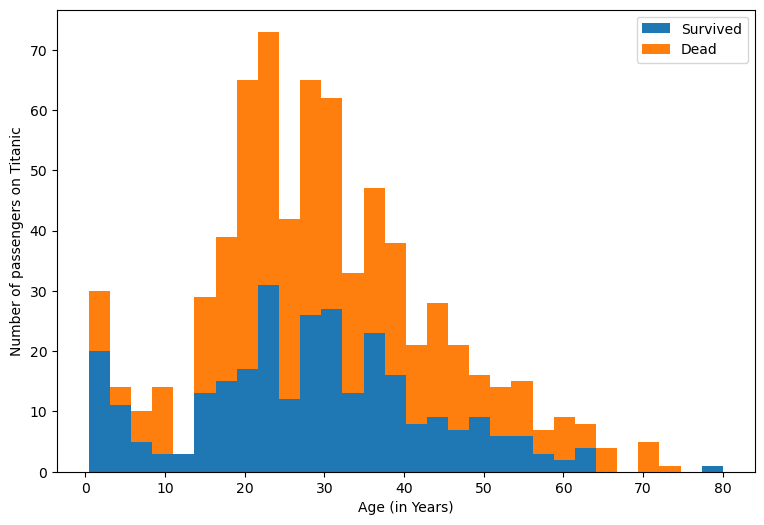

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.hist(
    [
        titanic[titanic["Survived"] == 1]["Age"],
        titanic[titanic["Survived"] == 0]["Age"],
    ],
    stacked=True,
    bins=30,
    label=["Survived", "Dead"],
)
plt.xlabel("Age (in Years)")
plt.ylabel("Number of passengers on Titanic")
plt.legend()

# GPU Programming using Python

There are several options available to work with python for GPU programming.
- [GPU Programming: When, Why and How?](https://enccs.github.io/gpu-programming/)
- [GPU Programming (Carpentries)](https://arc.leeds.ac.uk/lesson-gpu-programming/)

## 1. **`cuDF`** and **`cuML`** libraries in ![RAPIDS](img/RAPIDS-logo.png)

:::{important} [RAPIDS](https://rapids.ai/) is a high-level package collection

It implements CUDA functionalities and API with Python bindings.

**It only supports NVIDIA GPUs.**

- **`cuDF`** is the dataframe library for manipulating tabular datasets using GPU. cuDF provides a **Pandas**-like API for loading, joining, aggregating, filtering, and manipulating data.
- **`cuML`** is a suite of libraries that implement algorithms and mathematical primitives functions to train machine learning models on your data to make predictions, similar to the **`scikit-learn`** API.

:::

In [25]:
%timeit titanic[["Age", "Sex", "Survived", "Pclass"]].groupby(["Survived", "Sex"]).aggregate("median")

1.02 ms ± 16.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [26]:
import cudf

url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
titanic_gpu = cudf.read_csv(url, index_col="Name")

In [27]:
%timeit titanic_gpu[["Age", "Sex", "Survived", "Pclass"]].groupby(["Survived", "Sex"]).aggregate("median")

3.55 ms ± 52.7 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


:::{hint} GPU version was slower. Why?

The size of the data needs to be justifiably big for a GPU to be more performant than a CPU. The data is only {eval}`titanic.memory_usage().sum() / 1024` KB big.
:::

## 2. Numba

:::{important} `Numba` is an open-source just-in-time (JIT) compiler

- It translates a subset of Python and NumPy into fast machine code using LLVM.
- `Numba` offers options for parallelising Python code for CPUs and GPUs, with minor code changes.
:::

### 2.1 `numba.jit()` decorator

Numba provides several utilities for code generation, and its central feature is the `numba.jit()` decorator.

In [28]:
import numpy as np

mx = np.arange(10000).reshape(100, 100)


def go_slow(a):  # Function is compiled and runs in machine code
    result = 0.0
    for i in range(a.shape[0]):
        result += np.sin(a[i, i])
    return result


time_slow = %timeit -o go_slow(mx)

72.6 μs ± 1.02 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [29]:
from numba import jit


@jit(nopython=True)
def go_fast(a):
    result = 0.0
    for i in range(a.shape[0]):
        result += np.sin(a[i, i])
    return result


time_fast = %timeit -o go_fast(mx)

The slowest run took 5.05 times longer than the fastest. This could mean that an intermediate result is being cached.
3.45 μs ± 3.03 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


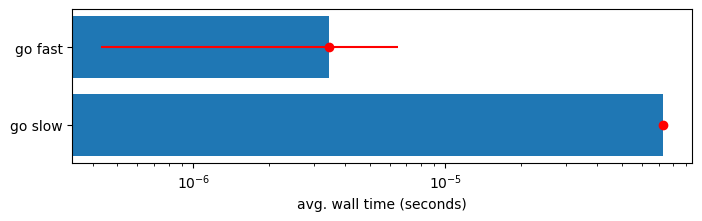

In [30]:
display_timings(go_slow=time_slow, go_fast=time_fast)

### 2.2 `ufunc` and `gufunc`

Another feature of Numba is to generate NumPy universal functions.

There are two types of universal functions:
- Those which operate on scalars are “universal functions” (`ufunc`), which are achieved via `@vectorize` decorator
- Those which operate on higher dimensional arrays and scalars are “generalized universal functions” (`gufunc`), which are achived via `@guvectorize` decorator

In [31]:
import math
import numpy as np
import numba


# a simple version without using numba
def func_cpu(x, y):
    return math.pow(x, 3.0) + 4 * math.sin(y)


@np.vectorize(otypes=[float])
def func_numpy_cpu(x, y):
    return math.pow(x, 3.0) + 4 * math.sin(y)

# def func_numpy(x, y):
#     return np.pow(x, 3.0) + 4 * np.sin(y)


@numba.vectorize([numba.float64(numba.float64, numba.float64)], target="cpu")
def func_numba_cpu(x, y):
    return math.pow(x, 3.0) + 4 * math.sin(y)


@numba.vectorize([numba.float64(numba.float64, numba.float64)], target="cuda")
def func_numba_gpu(x, y):
    return math.pow(x, 3.0) + 4 * math.sin(y)

:::{note}
The commented-out variant `func_numpy` which uses numpy functions (`np.pow` and `np.sin`) would automatically vectorize and perform little better than the first two -  making it a better formulation for the purpose. 
**We don't do that here to illustrate vectorized functions which may be required for custom algorithms**.
:::

In [32]:
N = 10000000
mx = np.random.rand(N)
result = np.empty_like(mx)

In [33]:
%%timeit -r 1 -q -o
for i in range(N):
    result[i] = func_cpu(mx[i], mx[i])

<TimeitResult : 2.99 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [34]:
time_cpu = _

In [35]:
%timeit -q -o result_numpy_cpu = func_numpy_cpu(mx, mx)

<TimeitResult : 2.25 s ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [36]:
time_numpy_cpu = _

In [37]:
%timeit -q -o result_numba_cpu = func_numba_cpu(mx, mx)

<TimeitResult : 170 ms ± 466 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [38]:
time_numba_cpu = _

In [39]:
%timeit -q -o result = func_numba_gpu(mx, mx)

<TimeitResult : 75.7 ms ± 1.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [40]:
time_numba_gpu = _

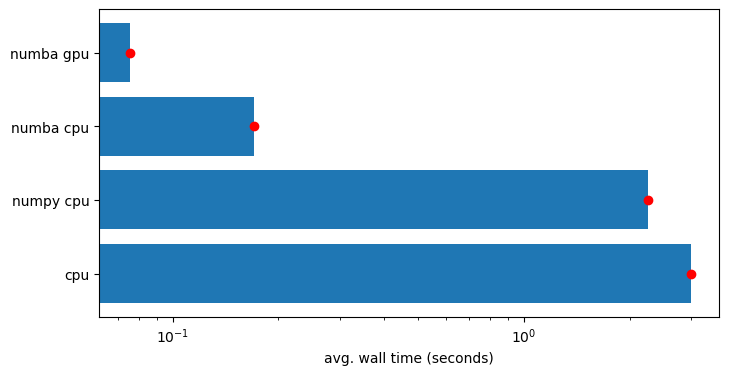

In [41]:
display_timings(
    cpu=time_cpu,
    numpy_cpu=time_numpy_cpu,
    numba_cpu=time_numba_cpu,
    numba_gpu=time_numba_gpu
)

:::{note}
- Using `ufunc` (or `gufunc`) for GPU programming may not always yield optimal performance due to automatic handling of data transfer and kernel launching.
- In practical applications, not every function can be constructed as a `ufunc`.
:::

### 2.3 An example for vector addition with manual data transfer

Sometimes, for better performance, one need to calibrate kernels and manually manage data transfer.

In [42]:
import numpy as np
import numba


@numba.cuda.jit
def func(a, b, c):
    """GPU vectorized addition. Computes C = A + B"""
    # like threadIdx.x + (blockIdx.x * blockDim.x)
    thread_id = numba.cuda.grid(ndim=1)
    size = len(c)

    if thread_id < size:
        c[thread_id] = a[thread_id] + b[thread_id]

Below, we explicitly move two arrays to the device memory.

In [43]:
N = 10000000
a = numba.cuda.to_device(np.random.random(N))
b = numba.cuda.to_device(np.random.random(N))
c = numba.cuda.device_array_like(a)

In [44]:
type(a)

numba.cuda.cudadrv.devicearray.DeviceNDArray

In [45]:
%timeit func.forall(len(a))(a, b, c)
print(c.copy_to_host())

2.64 ms ± 118 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
[0.39174679 0.99017048 0.88924116 ... 1.50751311 1.31866426 1.56619801]


In [46]:
nthreads = 256  # Enough threads per block for several warps per block
nblocks = (len(a) // nthreads) + 1  # Enough blocks to cover entire vector

%timeit func[nblocks, nthreads](a, b, c)
print(c.copy_to_host())

2.64 ms ± 1.27 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
[0.39174679 0.99017048 0.88924116 ... 1.50751311 1.31866426 1.56619801]


## 3. Jax

:::{important} `Jax` offers a drop-in import alias for Numpy and JIT compiler

Although `Jax` was originally designed to build neural networks with built-in support for auto-differentiation, it
can also be used to optimize other generic computation loads.

- Like, CuPy (coming soon), using `import jax.numpy as jnp` provides access to a large subset of optimized Numpy functions.
- Like Numba, we decorate with `@jax.jit` to JIT compile. Compiled function can run in GPU (CUDA and experimental ROCm support), TPU or CPU opportunistically.
- Unlike Numba, Jax can only work with certain kinds of code: [pure functions, for-loops written differently, etc.](https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html).


:::

### 3.1 Jax as NumPy

In [47]:
import numpy as np

data = np.random.random((10, 10_000))
data[5, 42] = np.nan
data[7, 1111] = np.nan

In [48]:
# compute 90th percentile ignoring NaNs, and along the rows of an array
time_numpy = %timeit -o np.nanpercentile(data, 90, axis=0)

300 ms ± 2.72 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
import jax.numpy as jnp

time_jax = %timeit -o jnp.nanpercentile(data, 90, axis=0)

201 μs ± 45 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


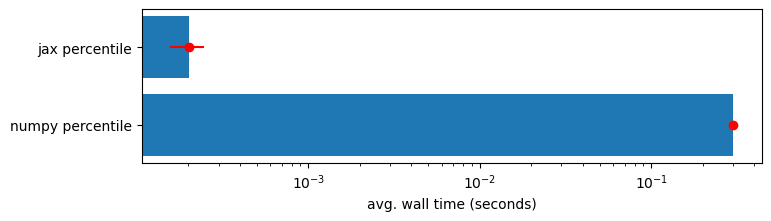

In [50]:
display_timings(numpy_percentile=time_numpy, jax_percentile=time_jax)

### 3.2 Jax as JIT compiler

Here we will revisit the example function shown in [section 2.2](#id-2-2-ufunc-and-gufunc).

In [51]:
import numpy as np
import jax.numpy as jnp
from jax import jit


def func_numpy(x, y):
    return np.power(x, 3.0) + 4 * np.sin(y)


@jit
def func_jax(x, y):
    return jnp.power(x, 3.0) + 4 * jnp.sin(y)

In [52]:
N = 10000000
mx = np.random.rand(N)

In [53]:
time_numpy = %timeit -o func_numpy(mx, mx)

229 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
time_jax = %timeit -o func_jax(mx, mx)

28.2 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
import jax
jax.devices()

[cuda(id=0)]

In [56]:
dmx = jax.device_put(mx)

time_jax_gpu = %timeit -o func_jax(dmx, dmx)

896 μs ± 158 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


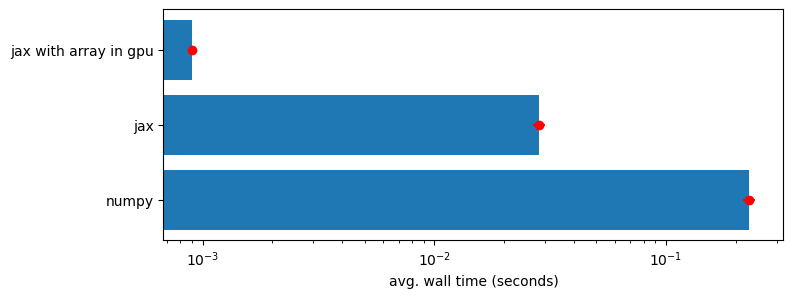

In [57]:
display_timings(numpy=time_numpy, jax=time_jax, jax_with_array_in_gpu=time_jax_gpu)

## 4. CuPy

:::{important} `CuPy` is a NumPy/SciPy-compatible array library for GPU-accelerated computing with Python. 
- It has been developed for NVIDIA GPUs but has experimental support both NVIDIA and AMD GPUs.
- All you need to do is replace `numpy` and `scipy` with `cupy` and `cupyx.scipy` in your Python code.
:::

:::{seealso}
Tutorials:
- https://docs.cupy.dev/en/stable/user_guide/basic.html
- https://arc.leeds.ac.uk/lesson-gpu-programming/02-cupy/index.html
- https://carpentries-incubator.github.io/lesson-gpu-programming/cupy.html
:::

**Replacement of numpy with cupy**

In [58]:
import cupy as cp
import numpy as np

lst = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# creating arrays
lst_cpu = np.array(lst)
lst_gpu = cp.array(lst)

# calculate the Euclidean norm
lst_cpu_norm = np.linalg.norm(lst_cpu)
lst_gpu_norm = cp.linalg.norm(lst_gpu)

print("Using Numpy: ", lst_cpu_norm)
print("Using Cupy:  ", lst_gpu_norm)

Using Numpy:  16.881943016134134
Using Cupy:   16.881943016134134


Same answer, same decimal precision.

**Speed comparison between cupy and numpy**

In [59]:
# NumPy and CPU Runtime
x_cpu = np.random.random((1000, 1000))
time_numpy = %timeit np.linalg.norm(x_cpu)

252 μs ± 113 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [60]:
# CuPy and GPU Runtime
x_gpu = cp.random.random((1000, 1000))
time_cupy = %timeit cp.linalg.norm(x_gpu)

533 μs ± 2.04 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


**Interfacing with user-defined Kernels**

In [61]:
import cupy as cp

x1 = cp.arange(25, dtype=cp.float32).reshape(5, 5)
x2 = cp.arange(25, dtype=cp.float32).reshape(5, 5)

x2

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.]], dtype=float32)

In [62]:
y = cp.zeros((5, 5), dtype=cp.float32)
y

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

**Simpler approach**: we use `ElementwiseKernel`

In [63]:
add_elemwise = cp.ElementwiseKernel(
   'float32 x1, float32 x2',
   'float32 y',
   'y = x1 + x2',
   'my_add_elemwise'
)

In [64]:
add_elemwise(x1, x2)

array([[ 0.,  2.,  4.,  6.,  8.],
       [10., 12., 14., 16., 18.],
       [20., 22., 24., 26., 28.],
       [30., 32., 34., 36., 38.],
       [40., 42., 44., 46., 48.]], dtype=float32)

**Complicated approach**: we use `RawKernel` which is essentially CUDA / C++ code

In [65]:
add_kernel = cp.RawKernel(
    r"""
extern "C" __global__
void my_add(const float* x1, const float* x2, float* y) {
    int tid = blockDim.x * blockIdx.x + threadIdx.x;
    y[tid] = x1[tid] + x2[tid];
}
""",
    "my_add",
)



In [66]:
add_kernel((5,), (5,), (x1, x2, y))  # grid, block and arguments

y

array([[ 0.,  2.,  4.,  6.,  8.],
       [10., 12., 14., 16., 18.],
       [20., 22., 24., 26., 28.],
       [30., 32., 34., 36., 38.],
       [40., 42., 44., 46., 48.]], dtype=float32)

## 5. PyCUDA

:::{important} [PyCUDA](https://pypi.org/project/pycuda/) is a Python programming environment for CUDA
- It allows users to access to NVIDIA’s CUDA parallel computing API from Python.
- PyCUDA is powerful library but only runs on NVIDIA GPUs.
- Knowledge of CUDA programming is needed.
:::

In [67]:
# Step 1: Initialization

import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule

In [68]:
# Step 2: Transferring data

# 2.1: Generating numbers with single precision
import numpy as np

mx_cpu = np.random.randn(4, 4)
mx_cpu = mx_cpu.astype(np.float32)
print(mx_cpu, end="\n")

# 2.2: Allocation of memory on GPU
mx_gpu = cuda.mem_alloc(mx_cpu.nbytes)

# 2.3: Transferring data from CPU (host) to GPU (device)
cuda.memcpy_htod(mx_gpu, mx_cpu)

[[-0.18454625 -1.2802349  -0.53252554  1.2434146 ]
 [-0.262641   -0.03363736  0.42076293  0.8300325 ]
 [-0.5384761   0.67297006 -0.18032275 -0.32671505]
 [-0.4846218  -1.0042293  -1.0989968  -1.0919274 ]]


In [69]:
# Step 3: Executing a kernel on GPU

# 3.1 Definition of the kernel
mod = SourceModule(
    """
  __global__ void doublify(float *a)
  {
    int idx = threadIdx.x + threadIdx.y*4;
    a[idx] *= 2.0;
  }
  """
)

# 3.2 Compile this kernel, loading it onto GPU, and then call this kernel
doublify = mod.get_function("doublify")

doublify(mx_gpu, block=(4, 4, 1), grid=(1, 1))

In [70]:
# Step 4: Transferring data from GPU (device) to CPU (host)

mx_doubled = np.empty_like(mx_cpu)
cuda.memcpy_dtoh(mx_doubled, mx_gpu)

print(mx_cpu, "\n\n", mx_doubled)

[[-0.18454625 -1.2802349  -0.53252554  1.2434146 ]
 [-0.262641   -0.03363736  0.42076293  0.8300325 ]
 [-0.5384761   0.67297006 -0.18032275 -0.32671505]
 [-0.4846218  -1.0042293  -1.0989968  -1.0919274 ]] 

 [[-0.3690925  -2.5604699  -1.0650511   2.4868293 ]
 [-0.525282   -0.06727471  0.84152585  1.660065  ]
 [-1.0769522   1.3459401  -0.3606455  -0.6534301 ]
 [-0.9692436  -2.0084586  -2.1979935  -2.1838548 ]]


In [71]:
# Bonus: Abstracting Away the Complications
# Using a pycuda.gpuarray to achieve the same effect with less writing

import pycuda.gpuarray as gpuarray

mx_gpu = gpuarray.to_gpu(np.random.randn(4, 4).astype(np.float32))
mx_doubled = (2 * mx_gpu).get()

print(mx_gpu, "\n\n", mx_doubled)

[[ 1.0338833   1.0801861   1.2065374  -0.23891842]
 [-0.28245965  1.0234996   0.5603343   1.1905514 ]
 [ 1.6897818   0.27629784  1.8410343  -0.37543473]
 [ 1.5824785   0.10719545  0.02376404 -0.00709134]] 

 [[ 2.0677667   2.1603723   2.4130747  -0.47783685]
 [-0.5649193   2.0469992   1.1206686   2.3811028 ]
 [ 3.3795636   0.5525957   3.6820686  -0.75086945]
 [ 3.164957    0.2143909   0.04752807 -0.01418267]]
